# 04.01 - Exploratory Data Analysis Setup

## Imports & setup

In [1]:
import pathlib
import datetime
from os import PathLike
from typing import Union

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import palettable
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

PROJECT_DIR = pathlib.Path.cwd().parent.resolve()
CLEAN_DATA_DIR = PROJECT_DIR / 'data' / '05-clean'

plt.style.use('grayscale')
# Custom Overrides to grayscale
params = {'legend.fontsize': 'x-large',
          'lines.linewidth': 0.75,
      'figure.figsize': (15, 7),
          'grid.color': 'white',
          'axes.axisbelow': False,
          'axes.grid': True,
          'axes.grid.axis': 'y',
     'axes.labelsize': 'x-large',
     'axes.titlesize':'xx-large',
     'xtick.labelsize':'x-large',
     'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
figsize=(15,7)

## Load Data

In [2]:
dtypes = {'temp': np.float64, 'dew_point_temp':np.float64, 'rel_hum':np.float64,
          'wind_speed': np.float64, 'visibility': np.float64, 'press': np.float64,
          'hmdx': np.float64, 'wind_chill': np.float64, 'weather': np.object,
         'hour_of_day': np.float64, 'year': np.float64, 'month': np.float64,
         'day_of_week': np.float64, 'day_of_year': np.float64, 'week_of_year': np.float64,
          'quarter': np.float64, 'stat_hol': np.object, 'day_light_hours': np.object,
          'hourly_demand': np.float64, 'daily_peak': np.float64}

df_orig = pd.read_csv(CLEAN_DATA_DIR / "clean-cut.csv", parse_dates=True,
                 dtype=dtypes, index_col=0, infer_datetime_format=True)

df_orig.head()

,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,hmdx,wind_chill,weather,hour_of_day,year,month,day_of_week,day_of_year,week_of_year,quarter,stat_hol,day_light_hours,hourly_demand,daily_peak
1994-01-01 00:00:00,-1.2,-3.8,83.0,15.0,19.3,99.91,NaN,-6.0,Cloudy,0.0,1994.0,1.0,5.0,1.0,52.0,1.0,True,False,14422.0,16892.0
1994-01-01 01:00:00,-0.9,-3.0,86.0,20.0,16.1,99.91,NaN,-6.0,Cloudy,1.0,1994.0,1.0,5.0,1.0,52.0,1.0,True,False,13845.0,16892.0
1994-01-01 02:00:00,-0.7,-3.2,83.0,15.0,16.1,99.87,NaN,-5.0,Cloudy,2.0,1994.0,1.0,5.0,1.0,52.0,1.0,True,False,13372.0,16892.0
1994-01-01 03:00:00,-0.8,-2.4,89.0,15.0,12.9,99.81,NaN,-5.0,Cloudy,3.0,1994.0,1.0,5.0,1.0,52.0,1.0,True,False,13025.0,16892.0
1994-01-01 04:00:00,-1.0,-3.3,84.0,19.0,16.1,99.77,NaN,-6.0,Mostly Cloudy,4.0,1994.0,1.0,5.0,1.0,52.0,1.0,True,False,12869.0,16892.0


In [3]:
df_orig.tail()

,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,hmdx,wind_chill,weather,hour_of_day,year,month,day_of_week,day_of_year,week_of_year,quarter,stat_hol,day_light_hours,hourly_demand,daily_peak
2018-12-31 19:00:00,2.5,1.0,90.0,19.0,9.7,98.51,NaN,NaN,"Rain,Fog",19.0,2018.0,12.0,0.0,365.0,1.0,4.0,False,False,16195.0,17125.0
2018-12-31 20:00:00,2.9,1.6,92.0,21.0,9.7,98.17,NaN,NaN,"Rain,Fog",20.0,2018.0,12.0,0.0,365.0,1.0,4.0,False,False,15668.0,17125.0
2018-12-31 21:00:00,3.7,2.6,93.0,21.0,9.7,97.98,NaN,NaN,"Rain,Fog",21.0,2018.0,12.0,0.0,365.0,1.0,4.0,False,False,14987.0,17125.0
2018-12-31 22:00:00,4.0,3.0,93.0,18.0,6.4,97.61,NaN,NaN,"Rain,Fog",22.0,2018.0,12.0,0.0,365.0,1.0,4.0,False,False,14560.0,17125.0
2018-12-31 23:00:00,4.3,3.4,94.0,12.0,9.7,97.37,NaN,NaN,"Rain,Fog",23.0,2018.0,12.0,0.0,365.0,1.0,4.0,False,False,13828.0,17125.0


## Single Time Series Plot

Plot the December data for the years either side of the missing data using a common y scale

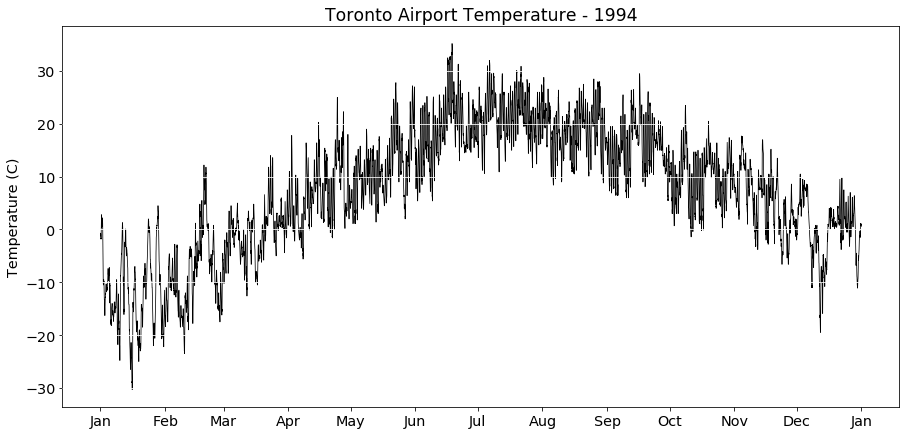

In [4]:
df = df_orig.copy(deep=True)
def single_time_series_plot(some_series: pd.Series, date_format: str, mdates_locator):
    myFmt = DateFormatter(date_format) 

    fig, ax1 = plt.subplots(frameon=False, figsize=figsize)
    ax1.plot(some_series)
    ax1.xaxis.set_major_formatter(myFmt)
    ax1.xaxis.set_major_locator(mdates_locator)
    return fig, ax1

date_format = '%b'
mdates_locator = mdates.MonthLocator()
df = df.loc['1994-01-01':'1994-12-31', 'temp']
fig, ax = single_time_series_plot(df,
                                  date_format=date_format,
                                  mdates_locator=mdates_locator)
ax.set_title('Toronto Airport Temperature - 1994')
ax.set_ylabel('Temperature (C)')

plt.show();

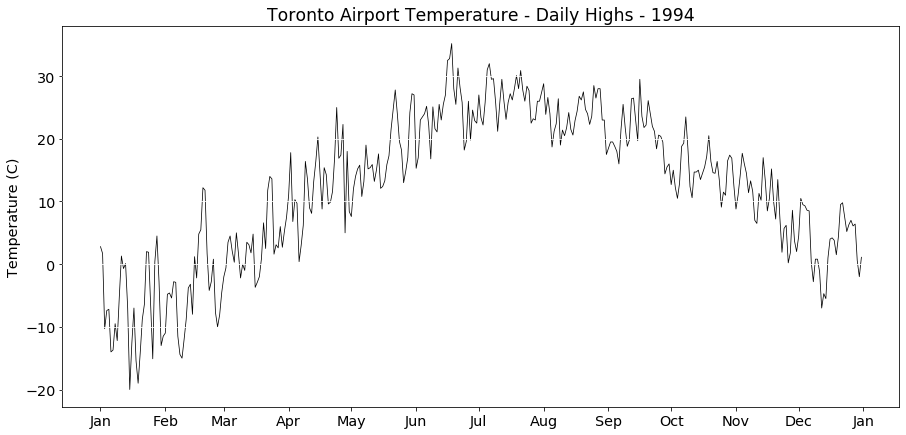

In [5]:
df = df_orig.copy(deep=True)
date_format = '%b'
mdates_locator = mdates.MonthLocator()
fig, ax = single_time_series_plot(df.loc['1994-01-01':'1994-12-31', 'temp'].resample('D').max(),
                                  date_format=date_format,
                                  mdates_locator=mdates_locator)
ax.set_title('Toronto Airport Temperature - Daily Highs - 1994')
ax.set_ylabel('Temperature (C)')

plt.show();

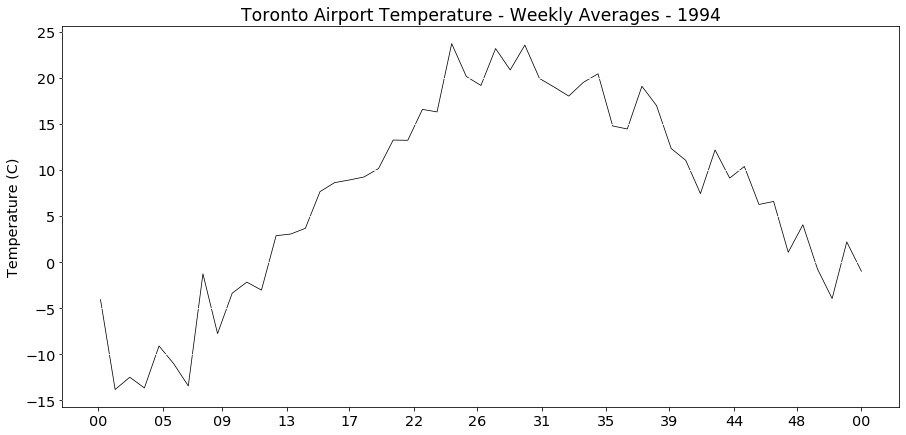

In [6]:
df = df_orig.copy(deep=True)
date_format = '%W' # Week Numbers
mdates_locator = mdates.MonthLocator()
df = df.loc['1994-01-01':'1994-12-31', 'temp'].resample('W').mean()

fig, ax = single_time_series_plot(df,
                                  date_format=date_format,
                                  mdates_locator=mdates_locator)
ax.set_title('Toronto Airport Temperature - Weekly Averages - 1994')
ax.set_ylabel('Temperature (C)')

plt.show();

## Multi Time Series plot

In [7]:
df_multi = df_orig.loc['1994-01-01':'1994-12-31', ['temp', 'dew_point_temp', 'rel_hum']].copy(deep=True)
df_multi.head()

,temp,dew_point_temp,rel_hum
1994-01-01 00:00:00,-1.2,-3.8,83.0
1994-01-01 01:00:00,-0.9,-3.0,86.0
1994-01-01 02:00:00,-0.7,-3.2,83.0
1994-01-01 03:00:00,-0.8,-2.4,89.0
1994-01-01 04:00:00,-1.0,-3.3,84.0


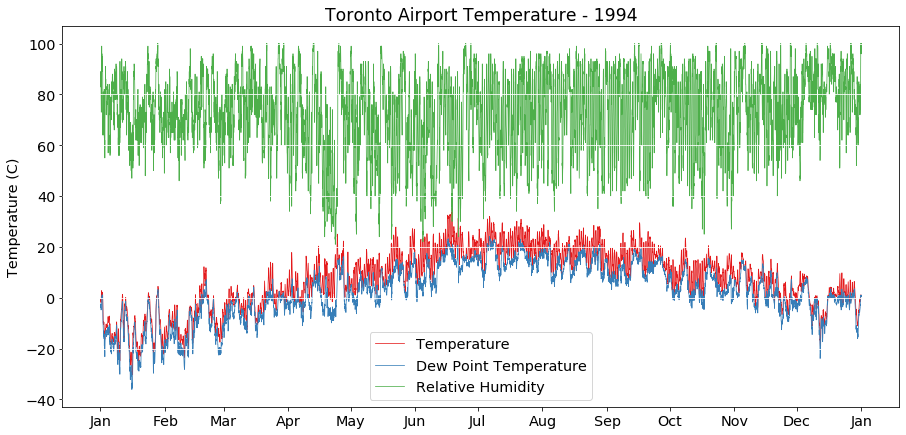

In [8]:
df = df_multi.copy(deep=True)
def multi_time_series_plot(df: pd.DataFrame, labels: list, date_format: str, mdates_locator):
    """
    If labels is an empty list then no labels attributed to series 
    
    """
    myFmt = DateFormatter(date_format) 

    seriess = [df[col] for col in df.columns]
    fig, ax1 = plt.subplots(frameon=False, figsize=figsize)
    ax1.set_prop_cycle('color', palettable.colorbrewer.qualitative.Set1_9.mpl_colors)
    if len(labels) == 0:
        labels = ['' for l in range(len(df.columns))]
    for series, label in zip(seriess, labels):
        ax1.plot(series, label=label)
    ax1.xaxis.set_major_formatter(myFmt)
    ax1.xaxis.set_major_locator(mdates_locator)
    return fig, ax1

date_format = '%b'
mdates_locator = mdates.MonthLocator()
labels = ['Temperature', 'Dew Point Temperature', 'Relative Humidity']
fig, ax = multi_time_series_plot(df,
                                 labels=labels,
                                 date_format=date_format,
                                 mdates_locator=mdates_locator)
ax.set_title('Toronto Airport Temperature - 1994')
ax.set_ylabel('Temperature (C)')
plt.legend()

plt.show();

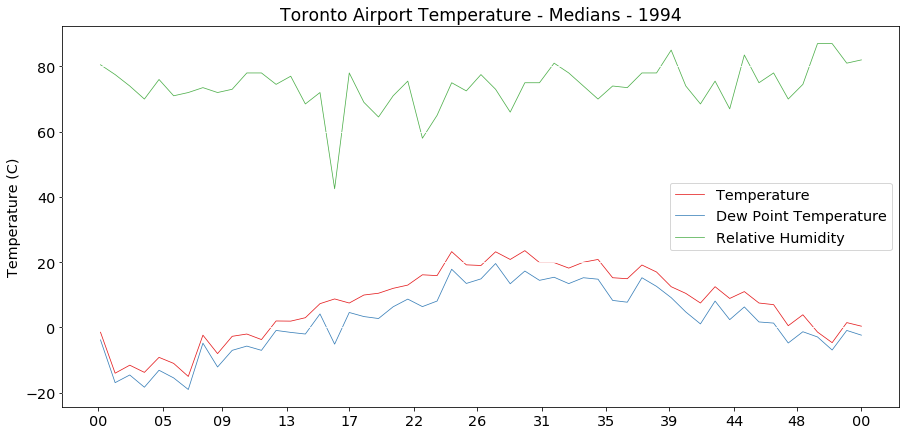

In [9]:
df = df_multi.copy(deep=True)

date_format = '%W'
mdates_locator = mdates.MonthLocator()
labels = ['Temperature', 'Dew Point Temperature', 'Relative Humidity']
df = df.resample('W').median()

fig, ax = multi_time_series_plot(df,
                                 labels=labels,
                                 date_format=date_format,
                                 mdates_locator=mdates_locator)
ax.set_title('Toronto Airport Temperature - Medians - 1994')
ax.set_ylabel('Temperature (C)')
plt.legend()

plt.show();

## Stacking For Seasonal Plots

In [10]:
df = df_orig.copy(deep=True)

ser_seas = df.loc['1994-01-01':'1996-12-31', 'temp']

ser_seas.tail()

1996-12-31 19:00:00   -12.7
1996-12-31 20:00:00   -13.0
1996-12-31 21:00:00   -13.4
1996-12-31 22:00:00   -13.4
1996-12-31 23:00:00   -13.6
Name: temp, dtype: float64

In [11]:
ser = ser_seas.copy(deep=True)

def hstack_for_seasonal(series: pd.Series, seasonal_period, resample_period, resampler_agg):
    """
    Works for:
    Months in Year %Y, m
    Days in Month %m, d
    Weeks in Year %Y, w
    Quarter in Year %Y, Q
    """

    seasonal_periods = series.index.strftime(seasonal_period).unique()
    seasonal_datasets = []
    if seasonal_period == '%Y':
        years = ['']
    if (seasonal_period == '%m') or (seasonal_period == '%W'):
        years = [year + '-' for year in series.index.strftime('%Y').unique()]

    for year in years:
        for period in seasonal_periods:
            name = year + period
            resampled_series = series.loc[year + period].resample(resample_period).agg(resampler_agg)
            resampled_vals = resampled_series.values
            resampled_index = resampled_series.index.strftime('%' + resample_period)
            seasonal_dataset = pd.Series(resampled_vals, index=resampled_index, name=name)
            seasonal_datasets.append(seasonal_dataset)

    hstacked = pd.concat(seasonal_datasets, axis=1, sort=True)
    return hstacked
    
seasonal_period = '%Y'
resample_period = 'w'
resampler_agg = 'max'
hstack_for_seasonal(ser, seasonal_period, resample_period, resampler_agg)  

,1994,1995,1996
0,2.8,1.3,0.3
0,-7.2,-0.6,2.0
0,1.3,12.8,11.8
0,2.0,6.0,7.2
0,4.5,0.4,2.4
0,-2.8,2.1,4.2
0,-3.2,0.8,-4.5
0,12.2,7.5,8.2
0,1.7,1.7,5.0
0,4.5,2.4,-1.1


In [12]:
ser = ser_seas.copy(deep=True)
seasonal_period = '%Y'
resample_period = 'w'
resampler_agg = 'max'
df = hstack_for_seasonal(ser, seasonal_period, resample_period, resampler_agg)
print(df.index)
print(len(df))
if all(df.index.values == '0') and len(df) >51:
    print('True')
    df.reset_index(inplace=True, drop=True)
df

Index(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
      dtype='object')
53
True


,1994,1995,1996
0,2.8,1.3,0.3
1,-7.2,-0.6,2.0
2,1.3,12.8,11.8
3,2.0,6.0,7.2
4,4.5,0.4,2.4
5,-2.8,2.1,4.2
6,-3.2,0.8,-4.5
7,12.2,7.5,8.2
8,1.7,1.7,5.0
9,4.5,2.4,-1.1


No handles with labels found to put in legend.


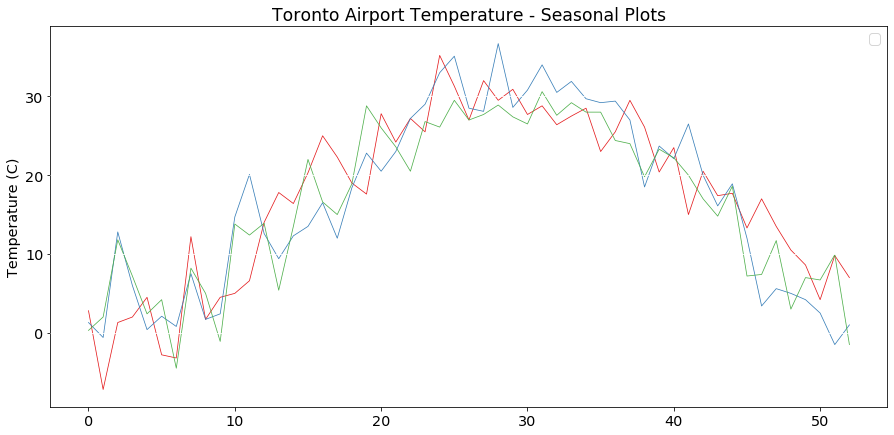

In [13]:
#df = df_multi.copy(deep=True)
def multi_seasonal_plot(df: pd.DataFrame, labels: list, date_format: str, mdates_locator):
    """
    If labels is an empty list then no labels attributed to series 
    
    """
    x = df.index

    seriess = [df[col] for col in df.columns]
    fig, ax1 = plt.subplots(frameon=False, figsize=figsize)
    ax1.set_prop_cycle('color', palettable.colorbrewer.qualitative.Set1_9.mpl_colors)
    if len(labels) == 0:
        labels = ['' for l in range(len(df.columns))]
    for series, label in zip(seriess, labels):
        ax1.plot(x, series)
    return fig, ax1


labels = list(df.columns)
fig, ax = multi_seasonal_plot(df,
                                 labels=labels,
                                 date_format=date_format,
                                  mdates_locator=mdates_locator)
ax.set_title('Toronto Airport Temperature - Seasonal Plots')
ax.set_ylabel('Temperature (C)')
plt.legend()

plt.show();
